# QuotationTool
In this notebook, you will use the *QuotationTool* to extract quotes from a list of texts. In addition to extracting the quotes, the tool also provides information about who the speakers are, the location of the quotes (and the speakers) within the text, the identified named entities, etc., which can be useful for your text analysis.  

**Note:** This code has been adapted (with permission) from the [GenderGapTracker GitHub page](https://github.com/sfu-discourse-lab/GenderGapTracker/tree/master/nlp/english) and modified to run on a Jupyter Notebook. The quotation tool’s accuracy rate is evaluated in [this article](https://doi.org/10.1371/journal.pone.0245533).

<div class="alert alert-block alert-warning">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/quotation-tool/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

## 1. Setup
Before you begin, you need to import the QuotationTool and the necessary libraries and initiate them to run in this notebook.

In [1]:
# import the QuotationTool
from extract_display_quotes import QuotationTool, DownloadFileLink

# initialize the QuotationTool
# qt = QuotationTool()

[nltk_data] Downloading package punkt to /Users/hcha9747/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from juxtorpus.corpus import Corpus, Corpora

corpora = Corpora()
corpora.widget()

In [4]:
from juxtorpus.corpus import Corpus
import pandas as pd

In [5]:
from pathlib import Path

articles = []
for i in range(1, 11):
    fname = f'text{i}.txt'
    article = (h := open(Path(f'/Users/hcha9747/Downloads/ten_texts/{fname}'), 'r')).readlines()
    h.close()
    article = ' '.join(article).replace('\n', '')
    articles.append((fname, article))

In [6]:
df = pd.DataFrame(articles, columns=['id', 'doc'])
df

,id,doc
0,text1.txt,"Facebook and Instagram, which Facebook owns, f..."
1,text2.txt,(CBC News) Republican lawmakers and previous a...
2,text3.txt,Federated States of Micronesia President David...
3,text4.txt,"Facebook and Instagram, which Facebook owns, f..."
4,text5.txt,(CBC News) Republican lawmakers and previous a...
5,text6.txt,Federated States of Micronesia President David...
6,text7.txt,"Facebook and Instagram, which Facebook owns, f..."
7,text8.txt,(CBC News) Republican lawmakers and previous a...
8,text9.txt,Federated States of Micronesia President David...
9,text10.txt,"Facebook and Instagram, which Facebook owns, f..."


In [7]:
corpus = Corpus.from_dataframe(df, col_doc='doc')
corpus.summary()

,
Corpus Type,Corpus
Number of Documents,10
Number of Total Words,3116
Size of Vocabulary,397
mean Words per Document,311
min Words per Document,90
max Words per Document,562
metas,id


In [8]:
qt = QuotationTool.from_corpus(corpus, text_name_meta_id='id')

Loading spaCy language model...
This may take a while...
Finished loading.


<div class="alert alert-block alert-warning">
<b>Installing Libraries</b> 

The requirements file <b>environment.yml</b> is included with this notebook. Take a look inside to find out what libraries you have just installed with the above command.

</div>

## 2. Load the data
This notebook will allow you to extract quotes directly from a text file (or a number of text files). Alternatively, you can also extract quotes from a text column inside your excel spreadsheet ([see an example here](https://github.com/Australian-Text-Analytics-Platform/quotation-tool/blob/main/documents/sample_texts.xlsx?raw=true)).  

<table style='margin-left: 10px'><tr>
<td> <img src='./img/txt_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/xlsx_icon.png' style='width: 55px'/> </td>
<td> <img src='./img/csv_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/zip_icon.png' style='width: 45px'/> </td>
</tr></table>

<div class="alert alert-block alert-warning">
<b>Uploading your text files</b> 
    
If you have a large number of text files (more than 10MB in total), we suggest you compress (zip) them and upload the zip file instead. If you need assistance on how to compress your file, please check [the user guide](https://github.com/Australian-Text-Analytics-Platform/quotation-tool/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-danger">
<b>Large file upload</b> 
    
If you have ongoing issues with the file upload, please re-launch the notebook via Binder again. If the issue persists, consider restarting your computer.
</div>



In [9]:
# upload the text files and/or excel spreadsheets onto the system
display(qt.upload_box)
print('Uploading large files may take a while. Please be patient.')
print('\033[1mPlease wait and do not press any buttons until the progress bar appears...\033[0m')

Uploading large files may take a while. Please be patient.
Please wait and do not press any buttons until the progress bar appears...


Once your files are uploaded, you can see a preview of the text in a table format (pandas dataframe).  

<div class="alert alert-block alert-info">
<b>Tools:</b>    
    
- nltk: for sentence tokenization
- spaCy: for text cleaning and normalisation
- pandas: for storing and displaying in dataframe (table) format
</div>

<div class="alert alert-block alert-warning">
<b>Specify the number of rows to display</b> 
    
By default, you will preview the first 5 rows of the extracted quotes in a pandas dataframe (table) format. However, you can preview more or less rows by specifying the number of rows you wish to display in the variable 'n' below. 
</div>

In [10]:
# specify the number of rows you wish to display
n=5

# display a preview of the pandas dataframe
qt.text_df.head(n)

,text,id,text_name,text_id
0,"Facebook and Instagram, which Facebook owns, f...",text1.txt,text1.txt,cef20ba91eb567643ce34d0caea6135a
1,(CBC News) Republican lawmakers and previous a...,text2.txt,text2.txt,c312b5e6b653788da60c24eba987c69c
2,Federated States of Micronesia President David...,text3.txt,text3.txt,61f0dfb97a832dcc1aaffed1383abeb0
3,"Facebook and Instagram, which Facebook owns, f...",text4.txt,text4.txt,6b6adcc54e31bab48c1e2af6b32e5ba5
4,(CBC News) Republican lawmakers and previous a...,text5.txt,text5.txt,6ed1621b9d14f4a8929ecc6db86aac68


## 3. Extract the quotes
Once your texts have been stored in a pandas dataframe, you can begin to extract the quotes from the texts. You can also extract named entities from your text by setting the named entities you wish to include in the below *inc_ent* variable. If you are extracting quotes from a lot of texts, be patient. As a guideline, for a corpus with a file size of 54.13 MB (~26,000 newspaper articles in plain text format), it can take ca 45 minutes to extract quotes.    

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- quote_extractor: for extracting quotes and speakers
- spaCy: for extracting named entities
    
<b>Note:</b> this tool uses spaCy to tokenize the text, which initially splits the text into tokens based on whitespace characters, and then applies language specific rules to further refine the outcome. For example, the word “don’t” does not contain whitespace, but would be split into two tokens: “do” and “n’t”, whereas “U.K.” would remain as one token. For more information about spaCy tokenizer, please visit [this page](https://spacy.io/usage/linguistic-features#tokenization).
</div>

<div class="alert alert-block alert-warning">
<b>Specify the number of rows to display</b> 
    
By default, you will preview the first 5 rows of the extracted quotes in a pandas dataframe (table) format. However, you can preview more or less rows by specifying the number of rows you wish to display in the variable 'n' below. 
</div>

<div class="alert alert-block alert-danger">
<b>Memory limitation in Binder</b> 
    
The free Binder deployment is only guaranteed a maximum of 2GB memory. Processing very large text files may cause the session (kernel) to re-start due to insufficient memory. Check [the user guide](https://github.com/Sydney-Informatics-Hub/HASS-29_Quotation_Tool/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

In [11]:
# specify the named entities you wish to include below
inc_ent = ['ORG','PERSON','GPE','NORP','FAC','LOC']

# specify the number of rows you wish to display
n=5

# extract quotes from the text and preview them in a pandas dataframe (table) format
quotes_df = qt.get_quotes(inc_ent)

# display a preview of the pandas dataframe
quotes_df.head(n)

Extracting quotes...
This may take a while...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 15.38it/s]


,text_id,text_name,quote_id,quote,quote_index,quote_entities,speaker,speaker_index,speaker_entities,verb,verb_index,quote_token_count,quote_type,is_floating_quote
0,cef20ba91eb567643ce34d0caea6135a,text1.txt,0,that Trump wouldn't be able to post for 24 hou...,"(84, 173)","[(Trump, PERSON)]","Facebook and Instagram, which Facebook owns","(0, 43)","[(Instagram, ORG)]",announcing,"(73, 83)",17,SVC,False
1,cef20ba91eb567643ce34d0caea6135a,text1.txt,1,that these actions follow years of hemming and...,"(275, 462)","[(Trump, PERSON)]",experts,"(261, 268)",[],noted,"(269, 274)",26,SVC,False
2,cef20ba91eb567643ce34d0caea6135a,text1.txt,2,"what happened in Washington, D.C., on Wednesda...","(565, 786)","[(Trump, PERSON), (Washington, GPE), (D.C., GPE)]","Jennifer Grygiel, a Syracuse University commun...","(464, 559)","[(Grygiel, PERSON), (Syracuse University, ORG)...",said,"(560, 564)",38,SVC,False
3,cef20ba91eb567643ce34d0caea6135a,text1.txt,3,This is what happens,"(984, 1004)",[],Grygiel,"(1007, 1014)","[(Grygiel, PERSON)]",said,"(1015, 1019)",4,QCQSV,False
4,cef20ba91eb567643ce34d0caea6135a,text1.txt,4,They're creeping along towards firmer action,"(1321, 1365)",[],Grygiel,"(1368, 1375)","[(Grygiel, PERSON)]",said,"(1376, 1380)",7,QCQSV,False


<div class="alert alert-block alert-warning">
<b>What information is included in the above table?</b> 

In general, the quotes are extracted either based on syntactic or heuristic rules. Some quotes can be stand-alone in a sentence, or followed by another quote (floating quote) from the same speaker. Please refer to [this document](https://doi.org/10.1371/journal.pone.0245533.s001) for further information about the quote extraction process.  
    
**text_id:** the unique ID of the text.
    
**text_name** the name of the text, i.e., the name of the .txt files or the 'text_name' column in the excel spreadsheet.
    
**quote_id/speaker_id:** the unique ID of the extracted quote/speaker.
    
**quote/speaker:** the content of the extracted quote and the speaker.
    
**verb:** the verb used to determine the extracted quote.
    
**quote_index/speaker_index/verb_index:** the location of the first and the last characters of the extracted quote/speaker/verb in the text.
    
**quote_entities/speaker_entities:** the entity name and type of the entities identified in the extracted quote/speaker.
    
**quote_token_count:** the length of the extracted quote (in character).
    
**quote_type:** the type of quote based on how it is extracted.
    
**floating_quote:** whether the extracted quote is a floating quote, i.e., a follow up quote from the same speaker (The value TRUE here means that the quote is a floating quote, while FALSE means that the quote is not a floating quote).

**Quotation symbols:** Q (Quotation mark), S (Speaker), V (Verb), C (Content).  

**Named Entities:**  PERSON (People, including fictional), NORP (Nationalities or religious or political groups), FAC (Buildings, airports, highways, etc.), ORG (Companies, agencies, institutions, etc.), GPE (Countries, cities, states), LOC (Non-GPE locations, mountain ranges, bodies of water).
</div>

## 4. Display the quotes
Once you have extracted the quotes, you can see a preview of the quotes using spaCy's visualisation tool, displaCy. 

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- displaCy: for displaying quotes, speakers and named entities
- ipywidgets: for interactive tool
</div>

<div class="alert alert-block alert-danger">
<b>Select the text and the entities to show</b> 

In order to preview the extracted information, select the text you wish to analyse and which entities to show. Then, you can click the ***Preview*** button to display them and the ***Save Preview*** button to save them as an html file. 
</div>

In [12]:
# display a preview of the extracted quotes, speakers and entities within the text
qt.analyse_quotes(inc_ent)

<div class="alert alert-block alert-danger">
<b>Select the text and the entities to show</b> 

You can also display the top named entitites identified in the quotes and/or speakers. You just need to select the text to analyse (option to analyse 'all texts' is also available), whether to display the identified entities in the speakers and/or quotes, whether to display the entity names and/or types, the number of top entities to display and finally, click the ***Show Top Entities*** and ***Save Top Entities*** buttons to display and save them, respectively. 
</div>

In [13]:
# check the top named entities identified in the quotes and/or speakers
qt.analyse_entities(inc_ent)

<div class="alert alert-block alert-warning">
<b>Capitalized words</b> 

Please note that lowercase or UPPERCASE words such as quote, QUOTE, Quote, etc. are recognised as different words by the tool, so you may see that they are counted differently in the above analysis.

</div>

## 5. Save the quotes
Finally, you can run the below code to save the quotes pandas dataframe into an Excel spreadsheet and download them to your local computer.  

In [14]:
# specify output directory and file name
output_dir = './output/'
file_name = 'quotes.xlsx'

# save quotes_df into an Excel spreadsheet
from pyexcelerate import Workbook
values = [quotes_df.columns] + list(quotes_df.values)
wb = Workbook()
wb.new_sheet('Sheet1', data=values)
wb.save(output_dir + file_name)

# download quotes_df to your computer
print('Click below to download:')
display(DownloadFileLink(output_dir + file_name, 'quotes.xlsx'))

Click below to download:


/Users/hcha9747/workspace/quotation-tool/output/quotes.xlsx

# 5a. Save quotes to new Corpus

In [15]:
quotes_df['speaker'] = quotes_df.speaker.astype('category')

In [16]:
corpus_q = Corpus.from_dataframe(quotes_df, col_doc='quote')

In [22]:
corpus_q.summary()

,
Corpus Type,Corpus
Number of Documents,76
Number of Total Words,1268
Size of Vocabulary,195
mean Words per Document,16
min Words per Document,4
max Words per Document,36
metas,"text_id, text_name, quote_id, quote_index, quo..."


In [25]:
corpus_q.meta.summary()

,text_id,text_name,quote_id,quote_index,quote_entities,speaker,speaker_index,speaker_entities,verb,verb_index,quote_token_count,quote_type,is_floating_quote
dtype,object,object,object,object,object,category,object,object,object,object,int64,object,bool
sample,cef20ba91eb567643ce34d0caea6135a,text1.txt,0,"(84, 173)","[(Trump, PERSON)]","Facebook and Instagram, which Facebook owns","(0, 43)","[(Instagram, ORG)]",announcing,"(73, 83)",17,SVC,False
top,cef20ba91eb567643ce34d0caea6135a,text1.txt,0,"(84, 173)",[],Grygiel,"(420, 427)","[('Grygiel', 'PERSON')]",said,"(0, 0)",10,SVC,False
top_freq,13,13,10,4,37,16,6,16,33,11,14,42,65
uniqs,"cef20ba91eb567643ce34d0caea6135a, c312b5e6b653...","text1.txt, text2.txt, text3.txt, text4.txt, te...","0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12","(84, 173), (275, 462), (565, 786), (984, 1004)...",,"Facebook and Instagram, which Facebook owns, e...","(0, 43), (261, 268), (464, 559), (1007, 1014),...",,"announcing, noted, said, saying, say, , says, ...","(73, 83), (269, 274), (560, 564), (1015, 1019)...","17, 26, 38, 4, 7, 18, 19, 10, 5, 39, 9, 12, 33...","SVC, QCQSV, SVQCQ, QCQ, CSV, QCQVS","False, True"
num_uniqs,10.0,10.0,13.0,41.0,,13.0,34.0,,9.0,35.0,15.0,6.0,2.0
mean,,,,,,,,,,,17.934211,,
std,,,,,,,,,,,11.732957,,
min,,,,,,,,,,,4.0,,
25%,,,,,,,,,,,9.75,,


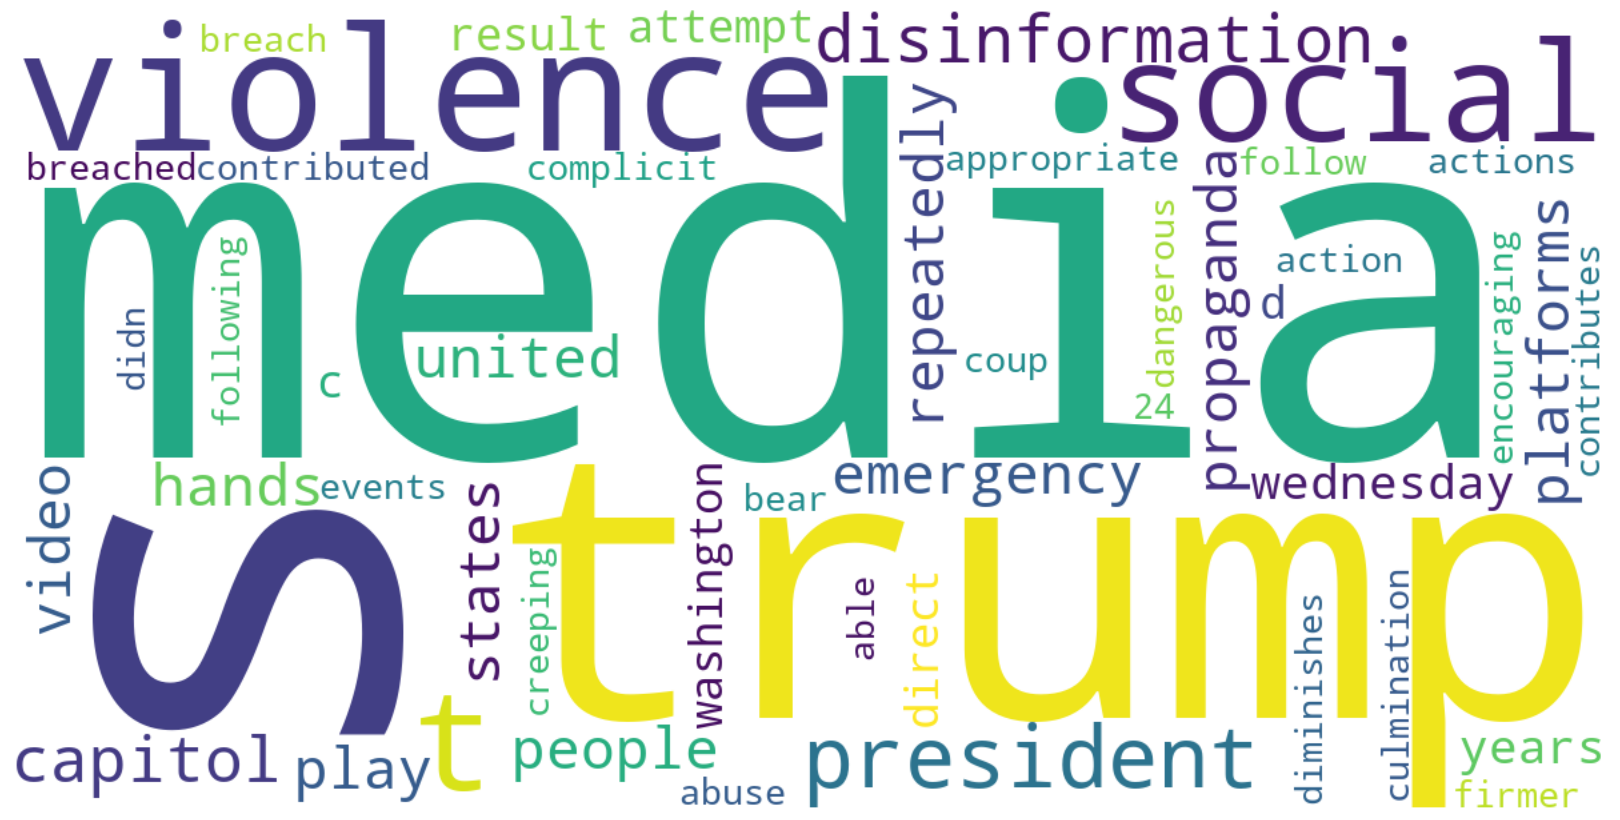

In [27]:
corpus_q.viz.wordcloud(metric='tf', word_type='word')

In [28]:
trump = corpus_q.slicer.filter_by_item('speaker', 'Trump')
trump.name = 'trump'
apple = corpus_q.slicer.filter_by_item('speaker', 'Apple')
apple.name = 'apple'

In [33]:
corpora.add(corpus_q)
corpora.widget()

In [37]:
from juxtorpus import Jux

J = Jux(corpora['trump'], corpora['trudeau'])

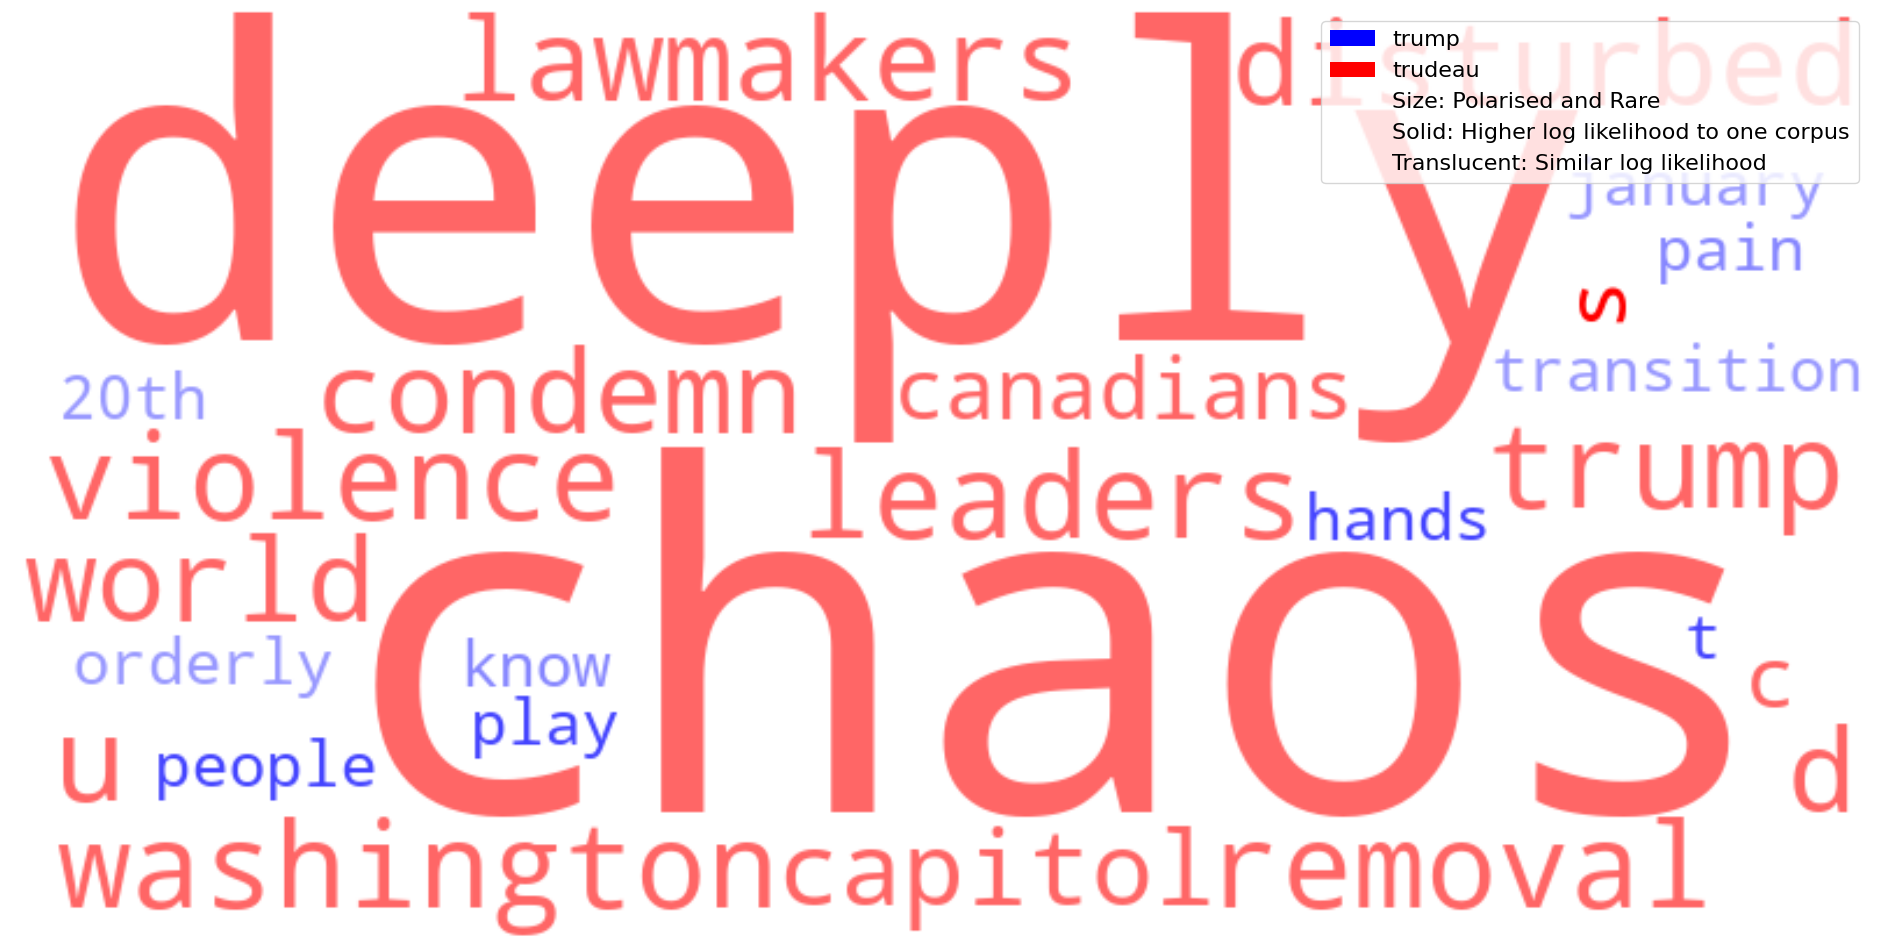

In [49]:
J.polarity.wordcloud(mode='log_likelihood')